# Pre processing

In [1]:
! pip install PyQt5

In [2]:
! pip install scikit-learn

In [3]:
! pip install pandas

In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import PyQt5
from pathlib import Path
import pandas as pd 
import datetime
import scipy.stats
import pickle

%matplotlib qt5

In [5]:
path_to_project =  Path('/Users/gorodni4eva/Desktop/TheDATA')

In [6]:
path_to_raws = path_to_project / 'Raws'

In [7]:
path_to_preps = path_to_project / 'Preproques'

_____________________________________________________________________________________

In [3]:
path_to_Epochs = 'Epochs'

In [9]:
sbj_id = '038'

In [263]:
raw = mne.io.read_raw_brainvision(path_to_raws / f'{sbj_id}.vhdr', eog=('HEOG', 'VEOG'), preload = True)

Extracting parameters from /Users/yulia/Desktop/TheDATA/Raws/038.vhdr...
Setting channel info structure...
Reading 0 ... 1235574  =      0.000 ...  2471.148 secs...


In [264]:
montage = mne.channels.make_standard_montage("standard_1020")

In [265]:
raw.rename_channels({'FP2':'Fp2'})

<RawBrainVision | 038.eeg, 62 x 1235575 (2471.1 s), ~584.5 MB, data loaded>

In [266]:
raw.set_montage(montage)

<RawBrainVision | 038.eeg, 62 x 1235575 (2471.1 s), ~584.5 MB, data loaded>

In [267]:
raw.notch_filter(50)
raw.filter(1, 45)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3301 samples (6.602 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.2s finished


<RawBrainVision | 038.eeg, 62 x 1235575 (2471.1 s), ~584.5 MB, data loaded>

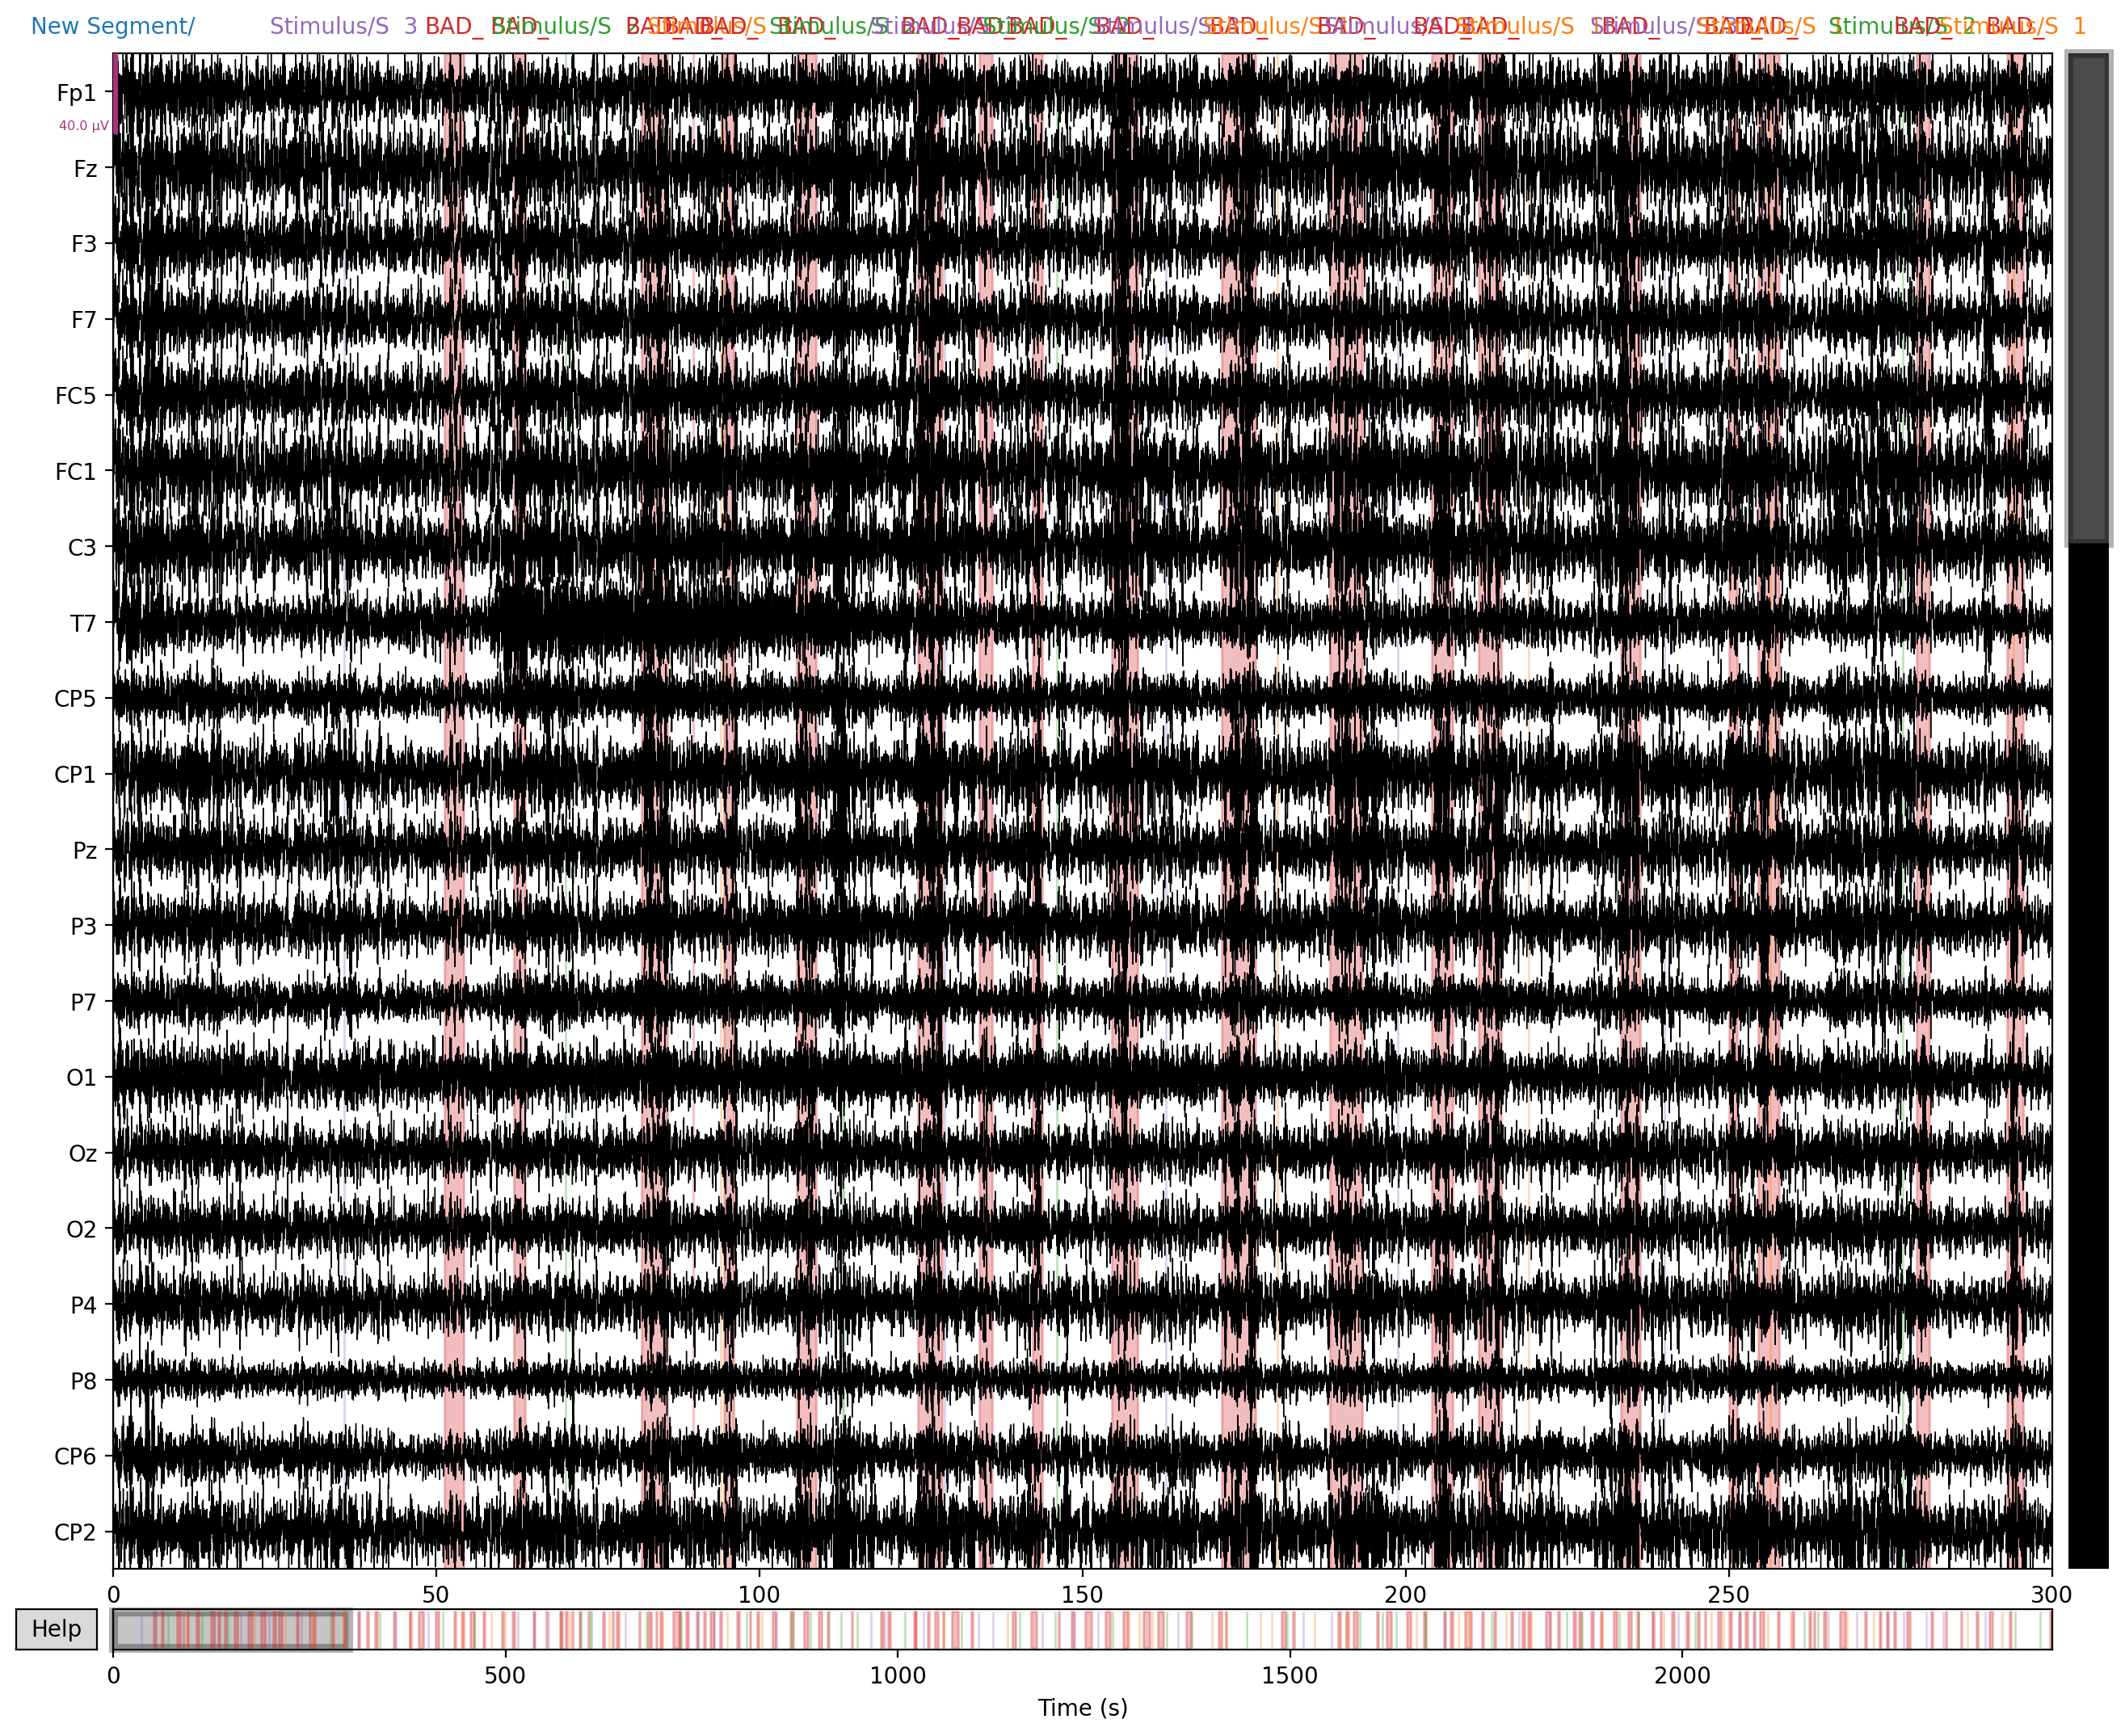

Channels marked as bad:
none


In [281]:
raw.plot(duration = 300)

In [274]:
ica = mne.preprocessing.ICA(n_components=0.99)

In [275]:
ica.fit(raw, reject_by_annotation = True)

Fitting ICA to data using 60 channels (please be patient, this may take a while)
Omitting 210628 of 1235575 (17.05%) samples, retaining 1024947 (82.95%) samples.
Selecting by explained variance: 15 components
Fitting ICA took 19.2s.


<ICA | raw data decomposition, method: fastica (fit in 44 iterations on 1024947 samples), 15 ICA components (60 PCA components available), channel types: eeg, no sources marked for exclusion>

Creating RawArray with float64 data, n_channels=17, n_times=1235575
    Range : 0 ... 1235574 =      0.000 ...  2471.148 secs
Ready.


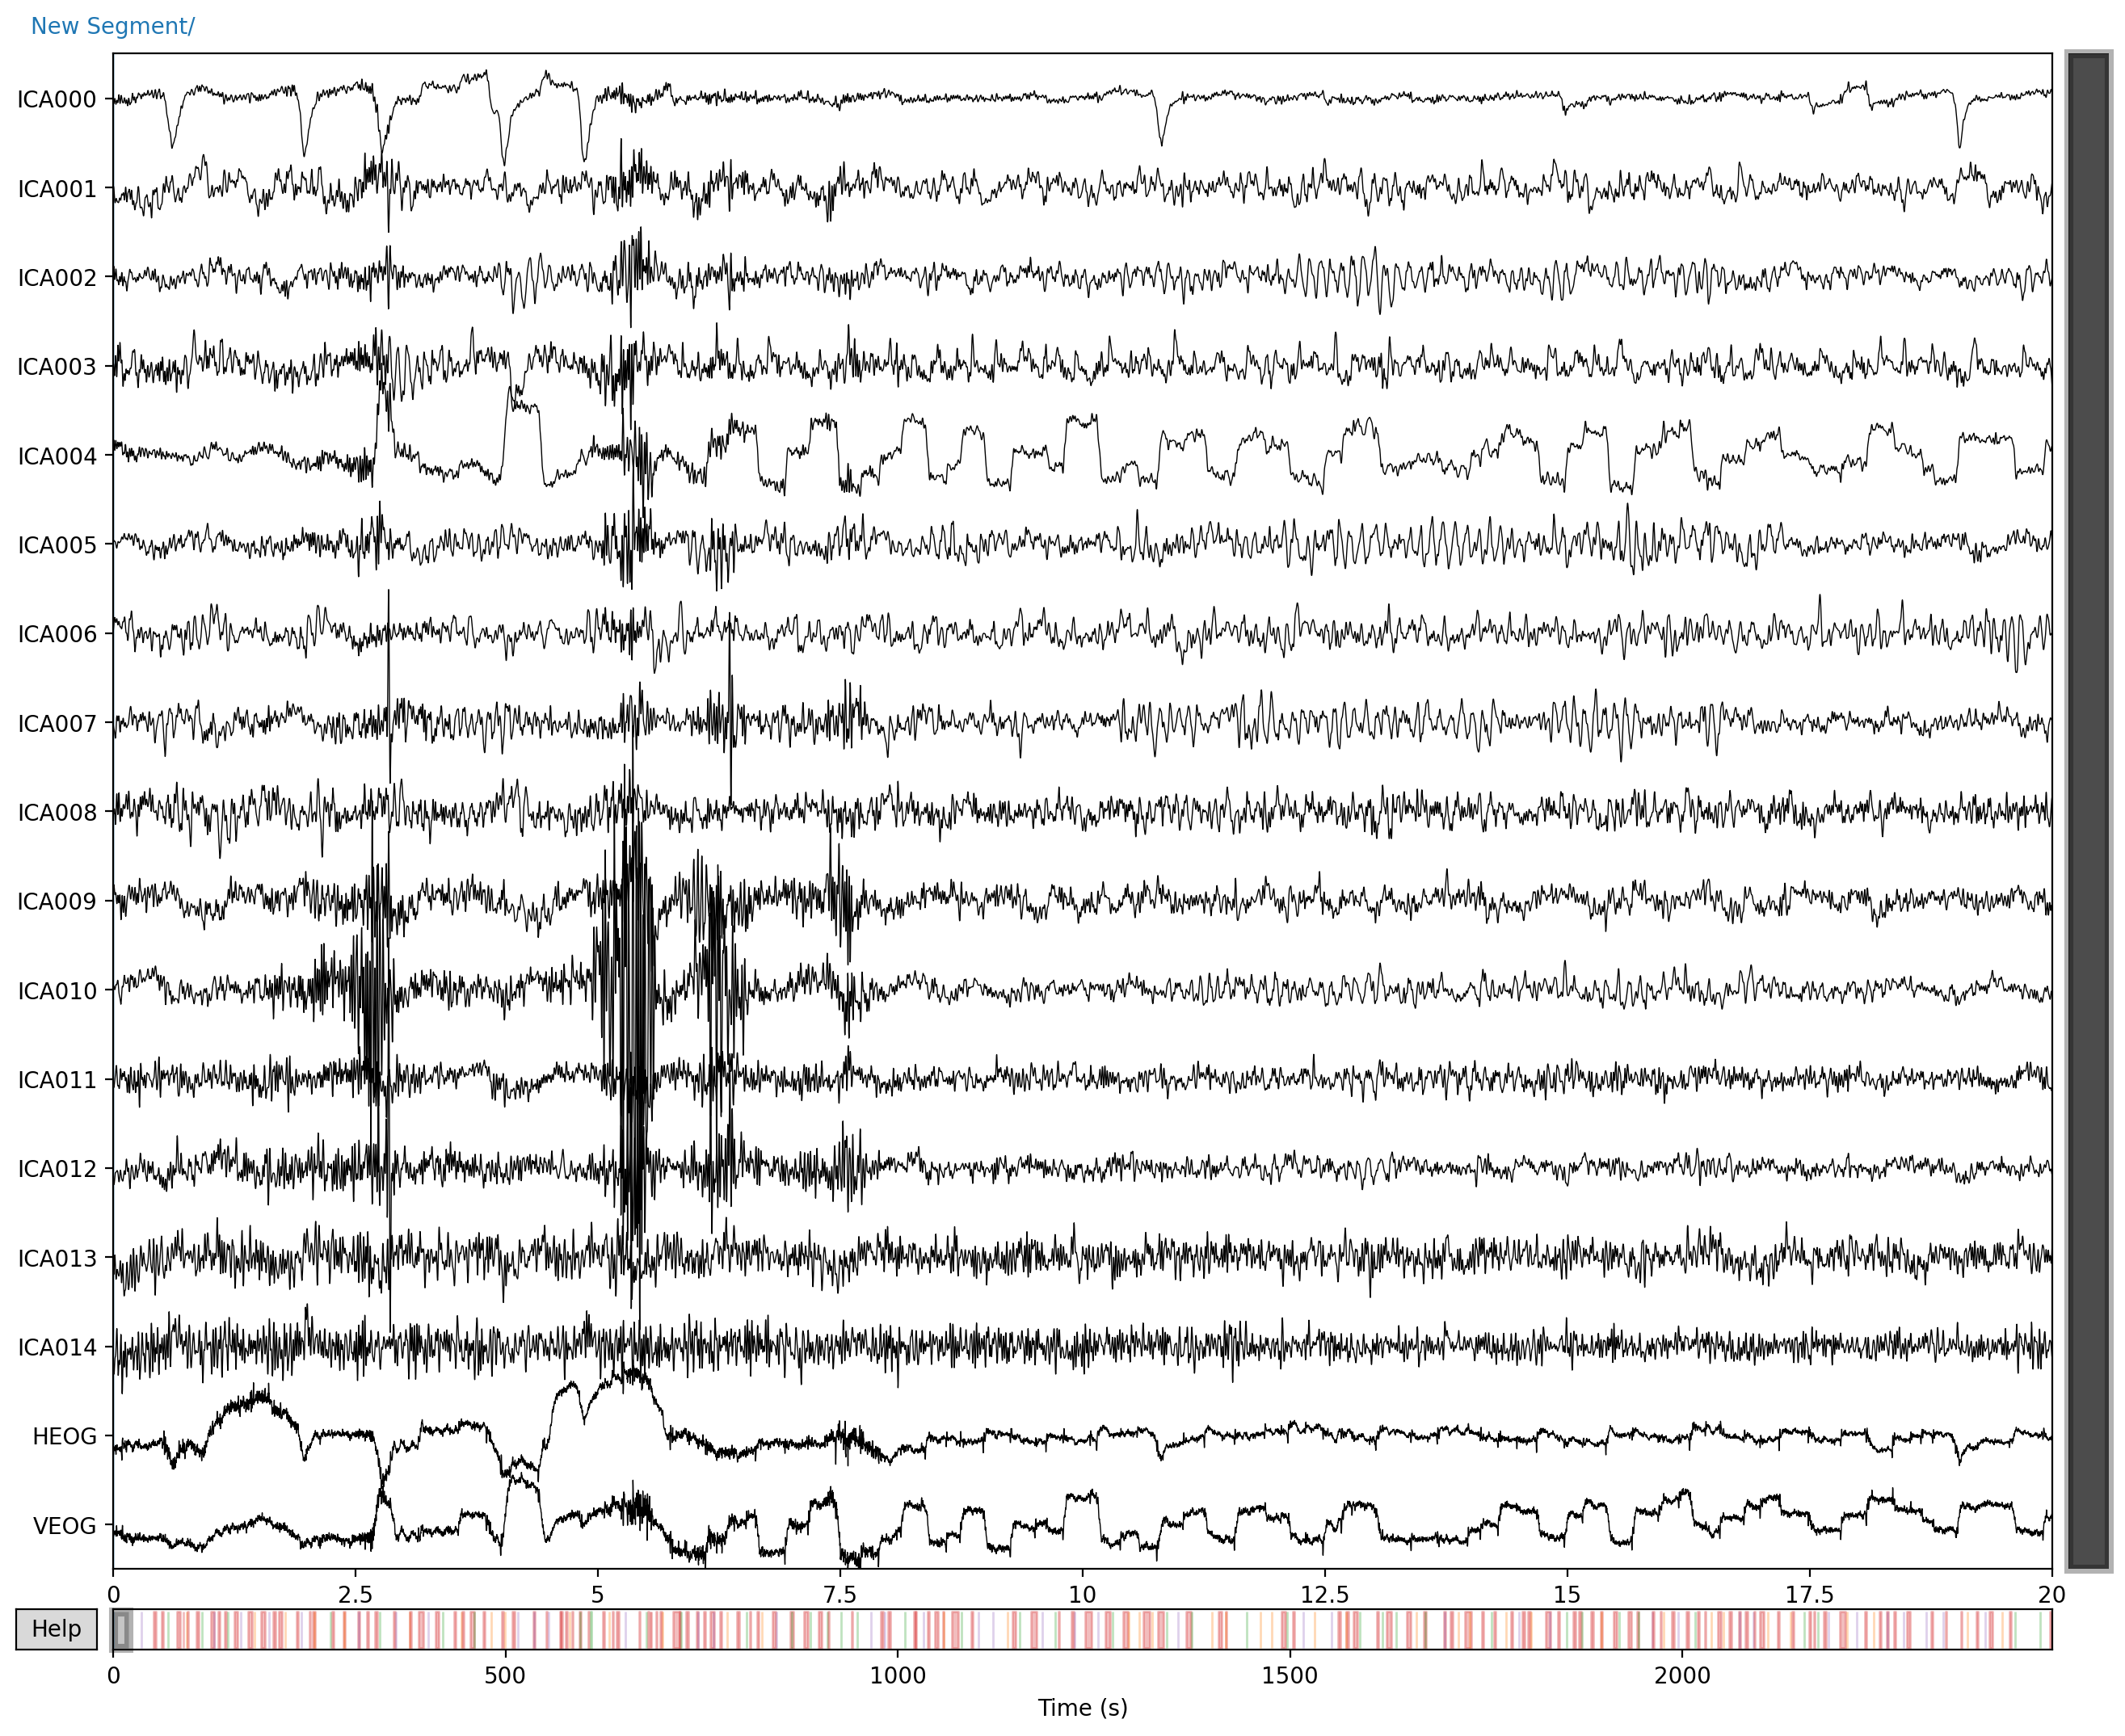

In [276]:
ica.plot_sources(raw)

In [ ]:
ica.plot_components()

In [278]:
 ica.apply(raw)

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 60 PCA components


<RawBrainVision | 038.eeg, 62 x 1235575 (2471.1 s), ~584.5 MB, data loaded>

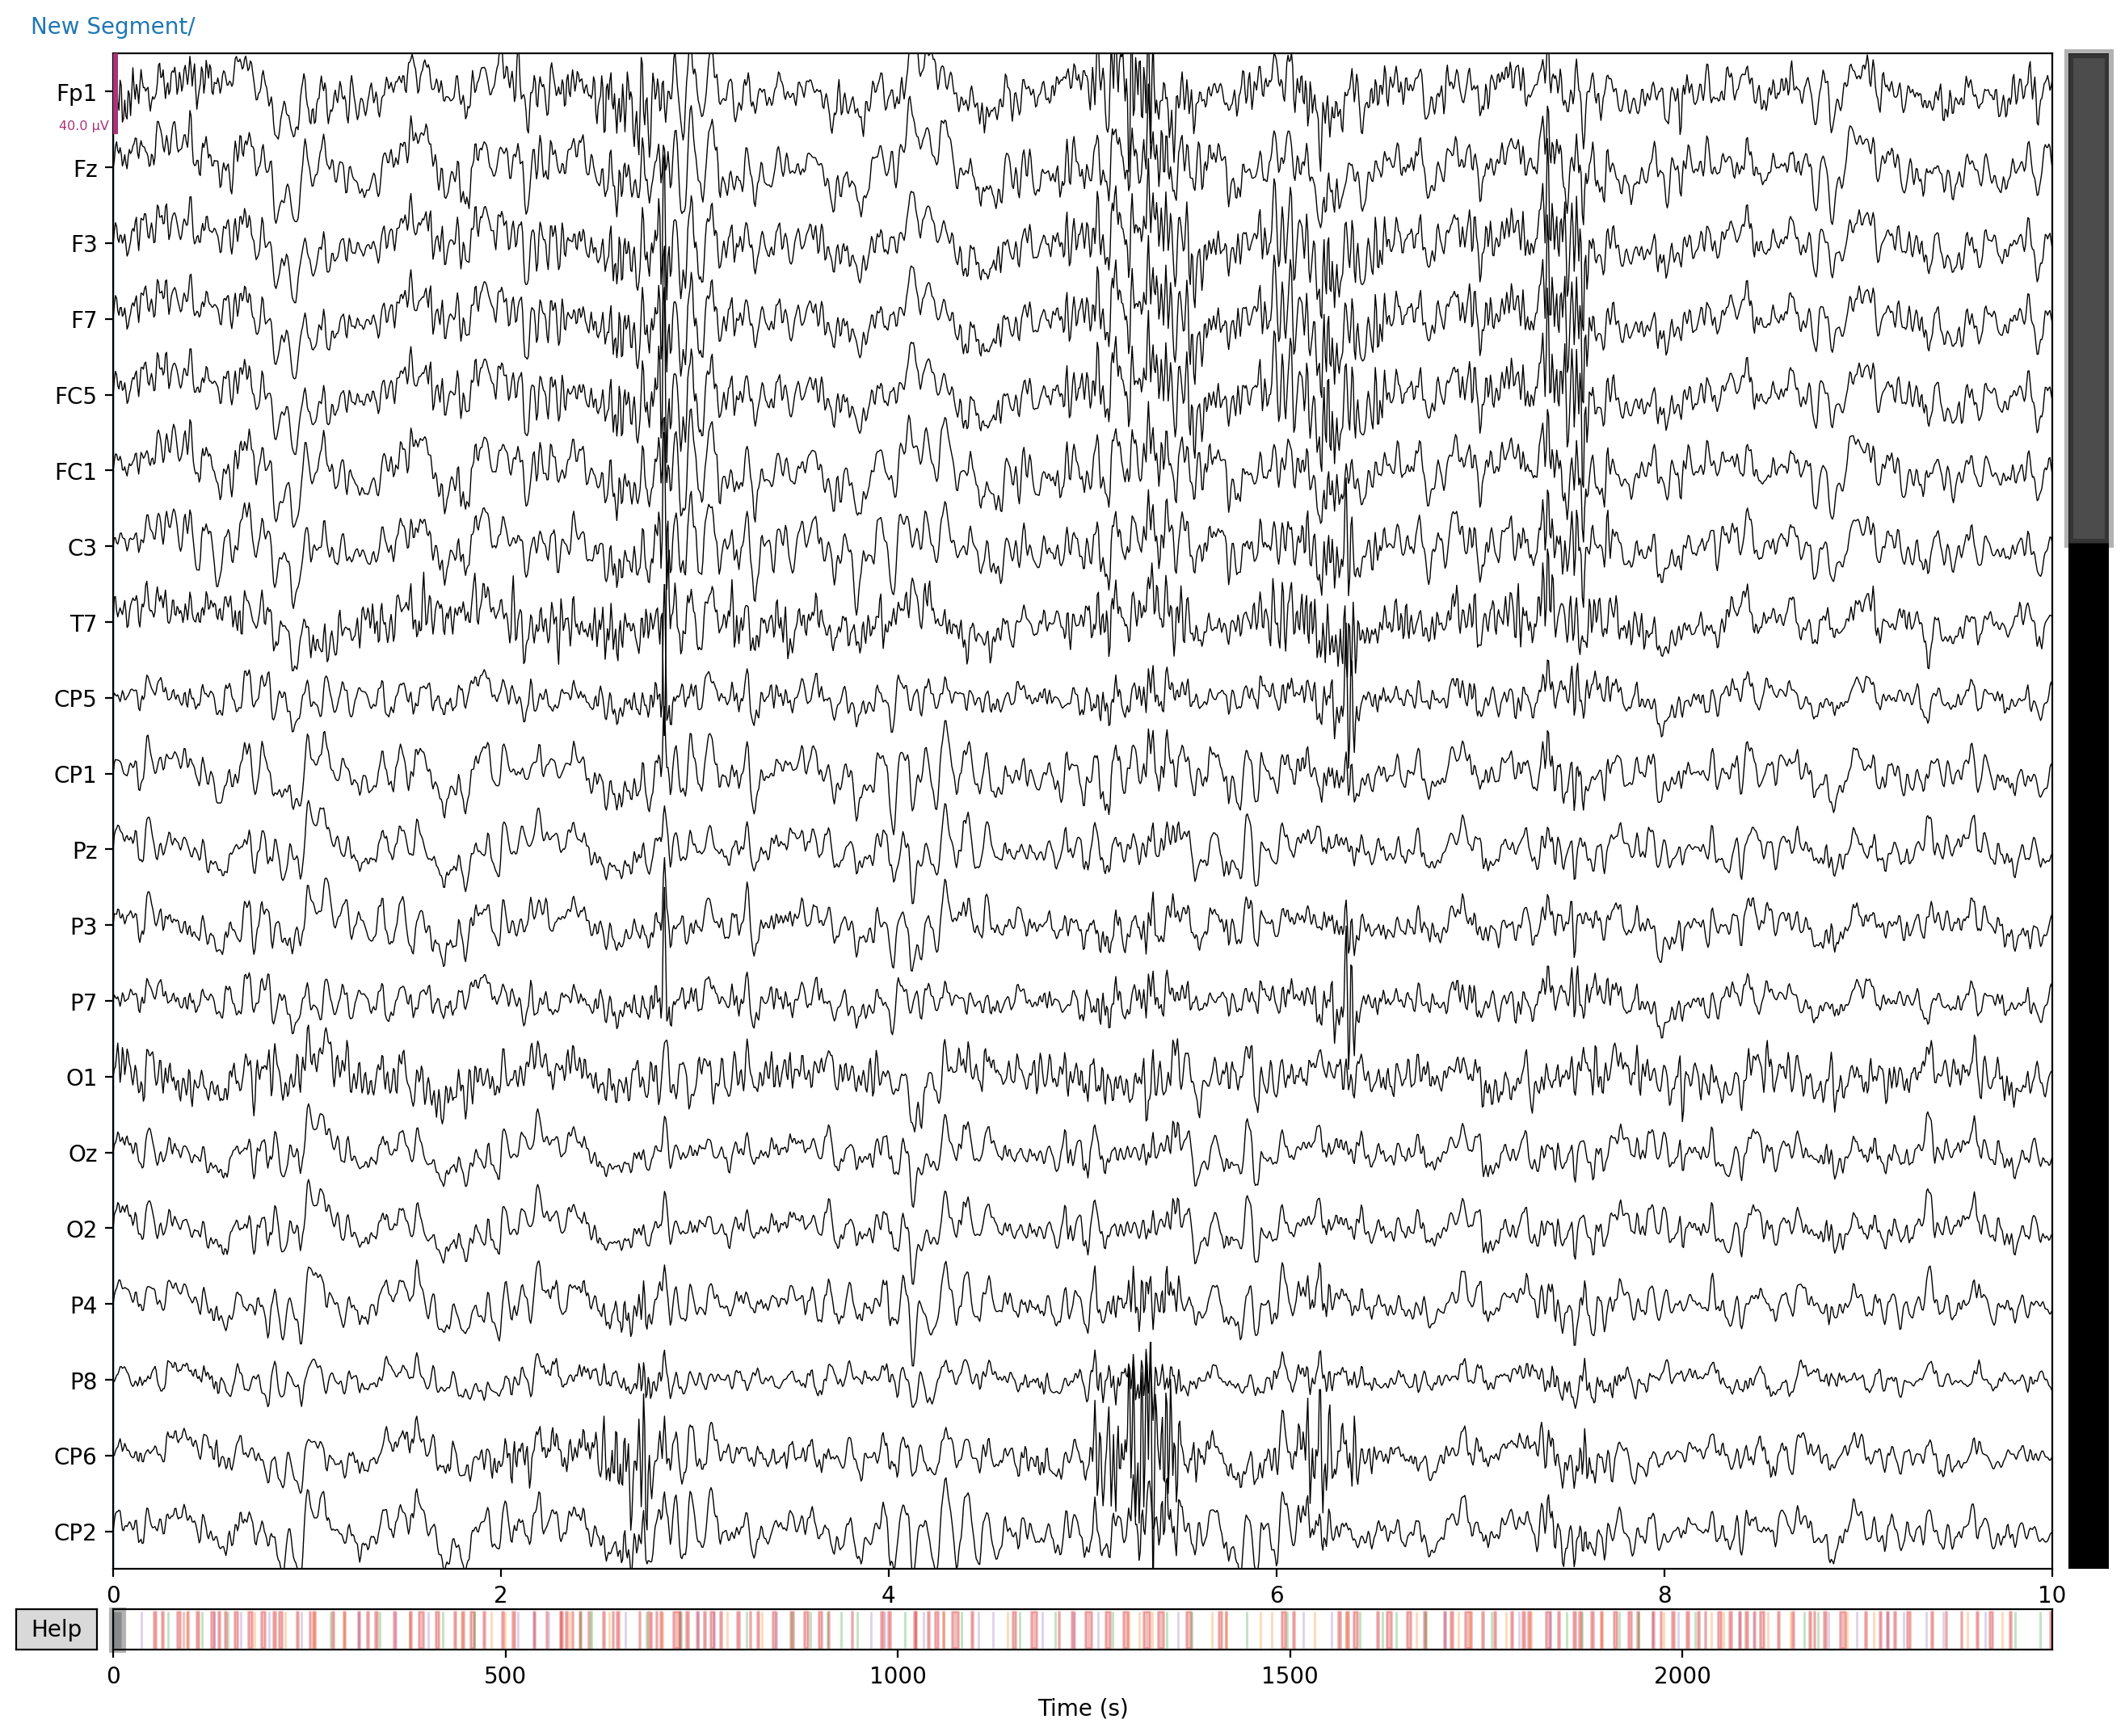

Channels marked as bad:
none


In [279]:
raw.plot()

In [280]:
raw.save(path_to_preps/ f'{sbj_id}.fif')

Writing /Users/yulia/Desktop/TheDATA/Preproques/038.fif


/var/folders/xl/rjvz791171gdq66nkr53ntvm0000gn/T/ipykernel_62541/244351705.py:1: RuntimeWarning: This filename (/Users/yulia/Desktop/TheDATA/Preproques/038.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(path_to_preps/ f'{sbj_id}.fif')


Closing /Users/yulia/Desktop/TheDATA/Preproques/038.fif
[done]


In [189]:
raw.info

NameError: name 'raw' is not defined

#  Events + Epochs 

In [13]:
sbj_id = '038'

In [14]:
raw = mne.io.read_raw_fif(path_to_preps / f'{sbj_id}.fif', preload = True) #обратная предыдущей 

Opening raw data file /Users/gorodni4eva/Desktop/TheDATA/Preproques/038.fif...


/var/folders/_l/bdnd72cs3h91mxg5t2_6vtb00000gn/T/ipykernel_23197/2465126361.py:1: RuntimeWarning: This filename (/Users/gorodni4eva/Desktop/TheDATA/Preproques/038.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_to_preps / f'{sbj_id}.fif', preload = True) #обратная предыдущей


    Range : 0 ... 1235574 =      0.000 ...  2471.148 secs
Ready.
Reading 0 ... 1235574  =      0.000 ...  2471.148 secs...


In [597]:
#raw.plot()

In [598]:
events, event_ids = mne.events_from_annotations(raw)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3']


In [599]:
event_ids

{'New Segment/': 1, 'Stimulus/S  1': 2, 'Stimulus/S  2': 3, 'Stimulus/S  3': 4}

In [600]:
events

array([[      0,       0,       1],
       [  17847,       0,       4],
       [  35022,       0,       3],
       [  47009,       0,       2],
       [  56469,       0,       3],
       [  64293,       0,       4],
       [  72985,       0,       3],
       [  81452,       0,       4],
       [  90061,       0,       2],
       [  99387,       0,       4],
       [ 109530,       0,       2],
       [ 120007,       0,       4],
       [ 128199,       0,       2],
       [ 138434,       0,       3],
       [ 147001,       0,       2],
       [ 156702,       0,       4],
       [ 169832,       0,       3],
       [ 180092,       0,       4],
       [ 188726,       0,       2],
       [ 200896,       0,       4],
       [ 209864,       0,       3],
       [ 221734,       0,       2],
       [ 230242,       0,       3],
       [ 240870,       0,       2],
       [ 249553,       0,       2],
       [ 258162,       0,       4],
       [ 268305,       0,       4],
       [ 277315,       0,   

In [601]:
new_event_id = {'NON-EUPH': 2, 'EUPH': 3,'CONTROL': 4}

In [602]:
new_events = events

In [603]:
filter_new_events = np.asarray([ev for ev in events if ev[2] in [val for val in new_event_id.values()]])

In [604]:
epochs = mne.Epochs(raw, filter_new_events,new_event_id, tmin = -0.5, tmax = 1, baseline = (-0.25, 0), reject_by_annotation=True)

Not setting metadata
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


In [605]:
 epochs

<Epochs |  120 events (good & bad), -0.5 - 1 sec, baseline -0.25 – 0 sec, ~90 kB, data not loaded,
 'CONTROL': 40
 'EUPH': 40
 'NON-EUPH': 40>

In [606]:
epochs.save(path_to_Epochs/ f'{sbj_id}.fif')

Loading data for 120 events and 751 original time points ...
26 bad epochs dropped
Loading data for 1 events and 751 original time points ...


/var/folders/xl/rjvz791171gdq66nkr53ntvm0000gn/T/ipykernel_70354/1623009769.py:1: RuntimeWarning: This filename (/Users/yulia/Desktop/TheDATA/Epochs/038.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(path_to_Epochs/ f'{sbj_id}.fif')


Loading data for 94 events and 751 original time points ...


In [187]:
print(raw.info["bads"])

NameError: name 'raw' is not defined

# ERP's

In [5]:
path2epochs = Path('Epochs')

In [6]:
sbj_files = [file for file in path2epochs.iterdir() if file.name.endswith('.fif')]

In [7]:
sbj_files

[WindowsPath('Epochs/001.fif'),
 WindowsPath('Epochs/002.fif'),
 WindowsPath('Epochs/004.fif'),
 WindowsPath('Epochs/005.fif'),
 WindowsPath('Epochs/006.fif'),
 WindowsPath('Epochs/007.fif'),
 WindowsPath('Epochs/008.fif'),
 WindowsPath('Epochs/009.fif'),
 WindowsPath('Epochs/010.fif'),
 WindowsPath('Epochs/011.fif'),
 WindowsPath('Epochs/012.fif'),
 WindowsPath('Epochs/013.fif'),
 WindowsPath('Epochs/014.fif'),
 WindowsPath('Epochs/015.fif'),
 WindowsPath('Epochs/016.fif'),
 WindowsPath('Epochs/017.fif'),
 WindowsPath('Epochs/018.fif'),
 WindowsPath('Epochs/019.fif'),
 WindowsPath('Epochs/020.fif'),
 WindowsPath('Epochs/021.fif'),
 WindowsPath('Epochs/022.fif'),
 WindowsPath('Epochs/023.fif'),
 WindowsPath('Epochs/024.fif'),
 WindowsPath('Epochs/025.fif'),
 WindowsPath('Epochs/026.fif'),
 WindowsPath('Epochs/027.fif'),
 WindowsPath('Epochs/028.fif'),
 WindowsPath('Epochs/029.fif'),
 WindowsPath('Epochs/030.fif'),
 WindowsPath('Epochs/031.fif'),
 WindowsPath('Epochs/032.fif'),
 Windows

In [12]:
all_epochs = {file.name : None for file in sbj_files}
for file in sbj_files: 
    epochs = mne.read_epochs(file)
    all_epochs[file.name] = epochs

Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\001.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
108 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\002.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
109 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\004.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
108 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\005.fif ...


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\001.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\002.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\004.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\005.fif) does not conform to MNE naming conventions. All epochs files should end w

    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
115 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\006.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
115 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\007.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
110 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\008.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF c

C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\006.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\007.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\008.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\009.fif) does not conform to MNE naming conventions. All epochs files should end w

86 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\010.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\011.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
118 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\012.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Read

C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\010.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\011.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\012.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\013.fif) does not conform to MNE naming conventions. All epochs files should end w

Not setting metadata
113 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\014.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
110 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\015.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
118 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\016.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
119 matching events found
No baseline correction applied
0 projecti

C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\014.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\015.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\016.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\017.fif) does not conform to MNE naming conventions. All epochs files should end w

109 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\018.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
118 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\019.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\020.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
112 matching events found
No baseline correction applied
0 projection items activated
Rea

C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\018.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\019.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\020.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\021.fif) does not conform to MNE naming conventions. All epochs files should end w

118 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\022.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\023.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
112 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\024.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
110 matching events found


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\022.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\023.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\024.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)


No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\025.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\026.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
118 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\027.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
120 matching events found


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\025.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\026.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\027.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)


No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\028.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
116 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\029.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
111 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\030.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
105 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\Pycha

C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\028.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\029.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\030.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\031.fif) does not conform to MNE naming conventions. All epochs files should end w

        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\032.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
118 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\033.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
117 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\034.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
N

C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\032.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\033.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\034.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\035.fif) does not conform to MNE naming conventions. All epochs files should end w

        0 CTF compensation matrices available
Not setting metadata
112 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\036.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
114 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\037.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
114 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Семён\PycharmProjects\media_manipulations\Epochs\038.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
94 matching events fo

C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\036.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\037.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2775982361.py:3: RuntimeWarning: This filename (Epochs\038.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file)


In [80]:
all_epochs

{'002.fif': <EpochsFIF |  109 events (all good), -0.5 - 1 sec, baseline -0.25 – 0 sec, ~38.8 MB, data loaded,
  'NON-EUPH': 39
  'EUPH': 33
  'CONTROL': 37>,
 '016.fif': <EpochsFIF |  119 events (all good), -0.5 - 1 sec, baseline -0.25 – 0 sec, ~42.4 MB, data loaded,
  'NON-EUPH': 40
  'EUPH': 40
  'CONTROL': 39>,
 '017.fif': <EpochsFIF |  109 events (all good), -0.5 - 1 sec, baseline -0.25 – 0 sec, ~38.8 MB, data loaded,
  'NON-EUPH': 37
  'EUPH': 36
  'CONTROL': 36>,
 '029.fif': <EpochsFIF |  111 events (all good), -0.5 - 1 sec, baseline -0.25 – 0 sec, ~39.5 MB, data loaded,
  'NON-EUPH': 39
  'EUPH': 36
  'CONTROL': 36>,
 '015.fif': <EpochsFIF |  118 events (all good), -0.5 - 1 sec, baseline -0.25 – 0 sec, ~42.0 MB, data loaded,
  'NON-EUPH': 38
  'EUPH': 40
  'CONTROL': 40>,
 '001.fif': <EpochsFIF |  108 events (all good), -0.5 - 1 sec, baseline -0.25 – 0 sec, ~38.5 MB, data loaded,
  'NON-EUPH': 34
  'EUPH': 38
  'CONTROL': 36>,
 '014.fif': <EpochsFIF |  110 events (all good), -0.

In [81]:
epochs.info('bads')



TypeError: 'Info' object is not callable

In [82]:
print(raw.info["bads"])

NameError: name 'raw' is not defined

In [83]:
all_erps = {name : {} for name in all_epochs}
for name in all_epochs:
    for event_id in all_epochs[name].event_id:
        current_epochs = all_epochs[name][event_id]
        erp = current_epochs.copy().load_data().interpolate_bads().average()
        all_erps[name][event_id] = erp

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.8 mm
Computing interpolation matrix from 50 sensor positions
Interpolating 10 sensors
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.8 mm
Computing interpolation matrix from 50 sensor positions
Interpolating 10 sensors
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.8 mm
Computing interpolation matrix from 50 sensor positions
Interpolating 10 sensors
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.8 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 1 sensors
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.8 

C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_ba

Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_ba

Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.8 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 1 sensors
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()


    Automatic origin fit: head of radius 94.8 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 1 sensors
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.8 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 1 sensors
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_ba

Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()


Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()


Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.8 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 1 sensors
Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()


Interpolating bad channels.
    Automatic origin fit: head of radius 94.8 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 1 sensors
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.8 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 1 sensors
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()


Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_ba

Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_ba

Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()


Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.8 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 1 sensors
Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()


Interpolating bad channels.
    Automatic origin fit: head of radius 94.8 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 1 sensors
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.8 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 1 sensors
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_ba

Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()


Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()


Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()


Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()


Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()


Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_ba

Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_ba

Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_ba

Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_ba

Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()
C:\Users\Семён\AppData\Local\Temp\ipykernel_26768\2877233026.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  erp = current_epochs.copy().load_data().interpolate_bads().average()


In [14]:
all_erps

{'001.fif': {'NON-EUPH': <Evoked | 'NON-EUPH' (average, N=34), -0.5 – 1 s, baseline -0.25 – 0 s, 60 ch, ~426 kB>,
  'EUPH': <Evoked | 'EUPH' (average, N=38), -0.5 – 1 s, baseline -0.25 – 0 s, 60 ch, ~426 kB>,
  'CONTROL': <Evoked | 'CONTROL' (average, N=36), -0.5 – 1 s, baseline -0.25 – 0 s, 60 ch, ~426 kB>},
 '002.fif': {'NON-EUPH': <Evoked | 'NON-EUPH' (average, N=39), -0.5 – 1 s, baseline -0.25 – 0 s, 60 ch, ~426 kB>,
  'EUPH': <Evoked | 'EUPH' (average, N=33), -0.5 – 1 s, baseline -0.25 – 0 s, 60 ch, ~426 kB>,
  'CONTROL': <Evoked | 'CONTROL' (average, N=37), -0.5 – 1 s, baseline -0.25 – 0 s, 60 ch, ~426 kB>},
 '004.fif': {'NON-EUPH': <Evoked | 'NON-EUPH' (average, N=33), -0.5 – 1 s, baseline -0.25 – 0 s, 60 ch, ~426 kB>,
  'EUPH': <Evoked | 'EUPH' (average, N=37), -0.5 – 1 s, baseline -0.25 – 0 s, 60 ch, ~426 kB>,
  'CONTROL': <Evoked | 'CONTROL' (average, N=38), -0.5 – 1 s, baseline -0.25 – 0 s, 60 ch, ~426 kB>},
 '005.fif': {'NON-EUPH': <Evoked | 'NON-EUPH' (average, N=36), -0.5

In [85]:
grand_averages

NameError: name 'grand_averages' is not defined

In [86]:
mne.viz.plot_compare_evokeds(all_erps, combine = 'mean')

TypeError: All evokeds entries  must be an instance of Evoked, got <class 'str'> instead.

In [24]:
mne.viz.plot_compare_evokeds({event_id : ga.copy().pick_channels(['Oz', 'O1', 'O2', 'P4', 'P7']) for event_id, ga in grand_averages.items()}, combine = 'mean')

NameError: name 'grand_averages' is not defined

In [ ]:
    #разностные кривые
    # выше - все эпохи пересохраняем с 3 им условием
    # пересохранить эрпис
    #  в ячейке ниже поменять комментарии , в 84 - поменять то что в комментах помечено, меняю каналы в соответсвии с ВА
    
    

In [19]:
differences = {}
#cond_list = ['NON-EUPH', 'EUPH'] #комментирую 2 и 3, разком - 4,5
#pairs = [(0, 1)]
cond_list = ['NON-EUPH', 'EUPH', 'CONTROL']
pairs = [(0, 1), (0, 2), (1, 2)]


for plus, minus in pairs:
    differences[f"{cond_list[plus]} - {cond_list[minus]}"] = [
        mne.combine_evoked([erp[cond_list[plus]], erp[cond_list[minus]]], [1, -1]) for erp in all_erps.values()
    ]

In [88]:
print(raw.info["bads"])


NameError: name 'raw' is not defined

In [ ]:
differences

In [91]:
plus = 'NON-EUPH'
minus = 'EUPH'
diff_name = f'{plus} - {minus}'
sbj_name = 'SBJ_ID'
data_to_keep = {'SBJ_ID': [], diff_name: []}
for sbj, erp in all_erps.items():
    data_to_keep[sbj_name].append(sbj.split('.')[0])
    tmp_d = mne.combine_evoked([erp[plus], erp[minus]], [1, -1])
    peaks = []
    _, _, peak = tmp_d.copy().crop(0.47, 0.75).pick_channels([chan]).get_peak(return_amplitude = True, )
    peaks.append(peak)
    data_to_keep[diff_name].append(np.mean(peaks) * 1e6)

diff_df = pd.DataFrame(data_to_keep)
diff_df

TypeError: pick_channels() missing 1 required positional argument: 'ch_names'

In [72]:
plus = 'NON-EUPH'
minus = 'EUPH'
diff_name = f'{plus} - {minus}'
sbj_name = 'SBJ_ID'
data_to_keep = {'SBJ_ID': [], diff_name: []}
for sbj, erp in all_erps.items():
    data_to_keep[sbj_name].append(sbj.split('.')[0])
    tmp_d = mne.combine_evoked([erp[plus], erp[minus]], [1, -1])
    peaks = []
    _, _, peak = tmp_d.copy().crop(0.24, 0.36).pick_channels([chan]).get_peak(return_amplitude = True, )
    peaks.append(peak)
    data_to_keep[diff_name].append(np.mean(peaks) * 1e6)

diff_df = pd.DataFrame(data_to_keep)
diff_df

NameError: name 'chan' is not defined

In [93]:
ga_differences = {cond : mne.grand_average(diff) for cond, diff in differences.items()}
print (ga_differences)

Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
{'NON-EUPH - EUPH': <Evoked | 'Grand average (n = 37)' (average, N=37), -0.5 – 1 sec, baseline -0.25 – 0 sec, 60 ch, ~441 kB>, 'NON-EUPH - CONTROL': <Evoked | 'Grand average (n = 37)' (average, N=37), -0.5 – 1 sec, baseline -0.25 – 0 sec, 60 ch, ~441 kB>, 'EUPH - CONTROL': <Evoked | 'Grand average (n = 37)' (average, N=37), -0.5 – 1 sec, baseline -0.25 – 0 sec, 60 ch, ~441 kB>}


In [103]:
#cond = 'NON-EUPH - EUPH' #заменяю на строчки:
#cond = 'NON-EUPH - CONTROL' 
cond = 'EUPH - CONTROL'

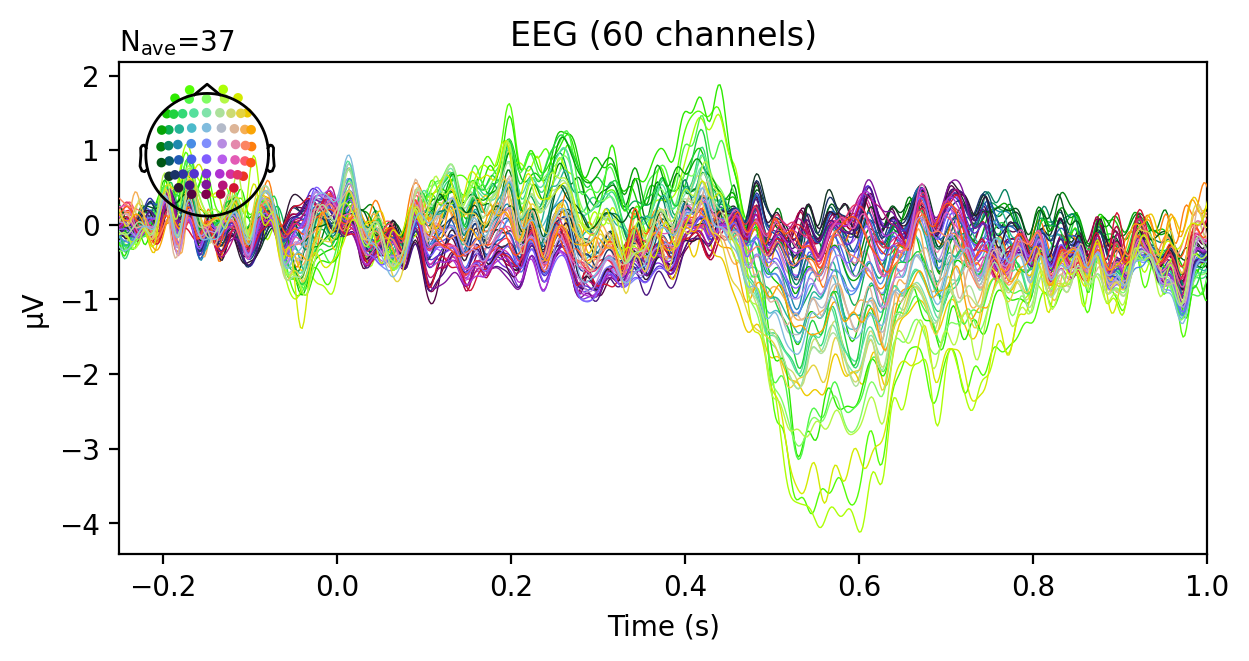

In [104]:
ga_differences[cond].crop(-0.25, None).plot() #ПЕРЕРИСОВАТЬ ВСЕ С .crop(-0.25, None)

In [70]:
ga_differences[cond].plot_image(show_names = 'all').copy().crop(0,None)

AttributeError: 'Figure' object has no attribute 'copy'

In [106]:
mne.viz.plot_compare_evokeds([evoked.crop(-0.25, None) for evoked in ga_differences.values()])

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


[<Figure size 1600x1200 with 1 Axes>]

2024-06-21 13:40:48.737 python[26100:11429438] Warning: Window move completed without beginning


In [28]:
ga_differences[cond].plot_topo()

SyntaxError: invalid syntax (2680822202.py, line 1)

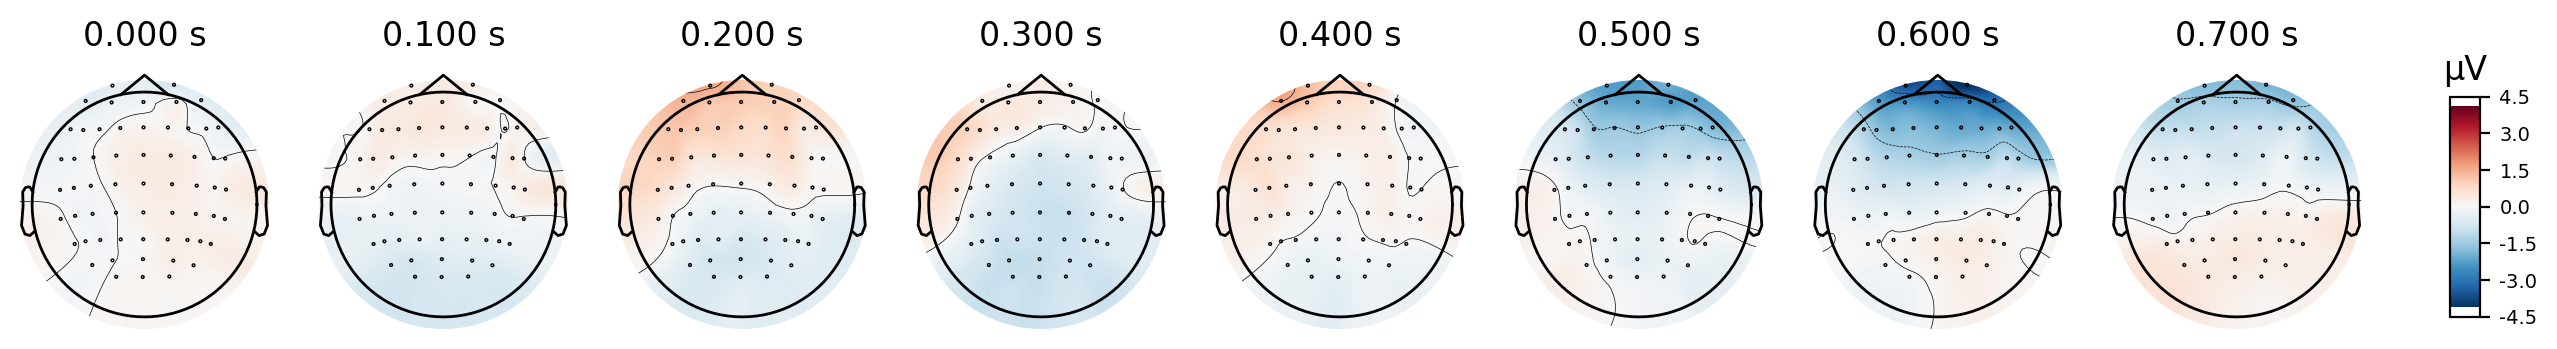

In [241]:
ga_differences[cond].plot_topomap(times = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])

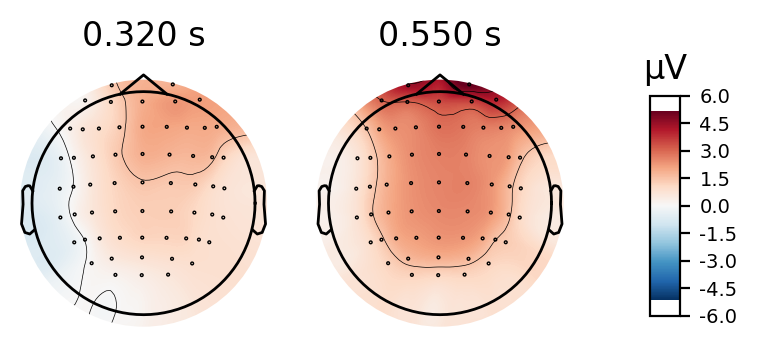

In [228]:
#ga_differences[cond].plot_topomap(times = [0.32, 0.55])

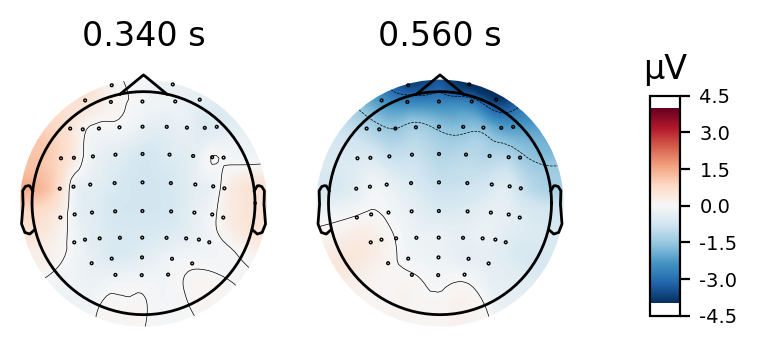

In [246]:
ga_differences[cond].plot_topomap(times = [0.34, 0.56])

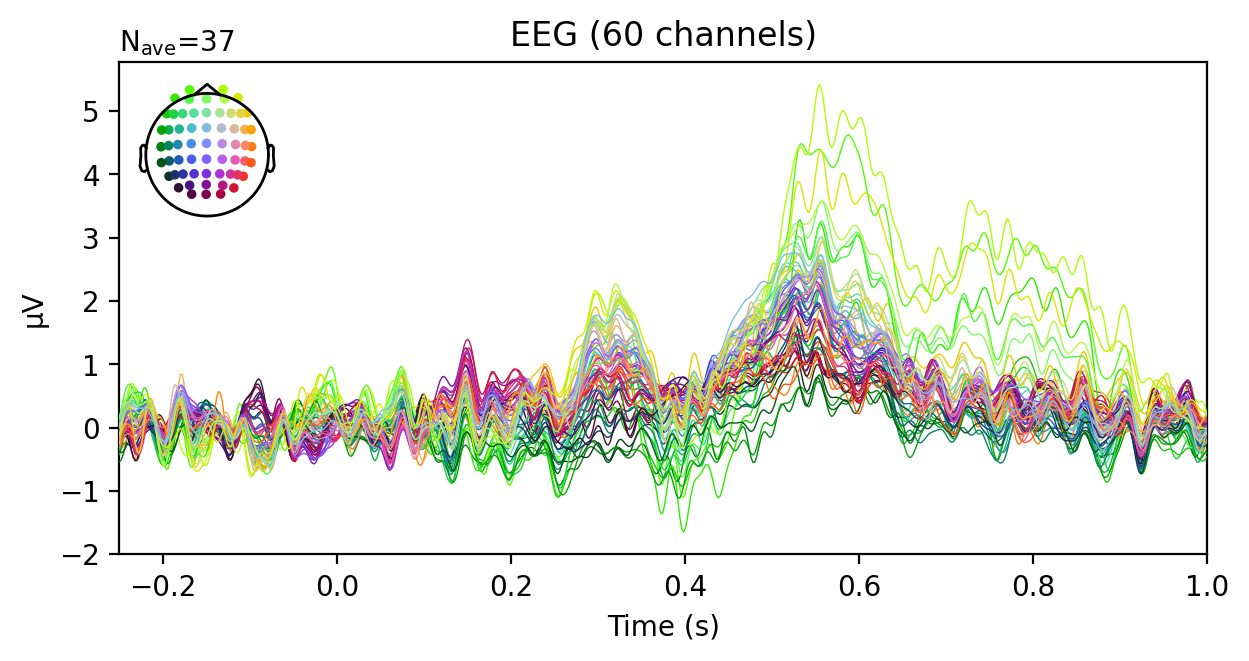

In [64]:
ga_differences[cond].plot()

In [100]:
mne.viz.plot_compare_evokeds(ga_differences).copy().crop(-0.25,None)

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


AttributeError: 'list' object has no attribute 'crop'

In [105]:
mne.viz.plot_compare_evokeds([evoked.crop(-0.25, None) for evoked in ga_differences])


AttributeError: 'str' object has no attribute 'crop'

In [18]:
gas = {
    c: mne.grand_average([erp[c] for erp in all_erps.values()])
    for c in cond_list
}

mne.viz.plot_compare_evokeds({
    c: ga.copy().pick_channels(['all']) for c, ga in gas.items()
}, combine = 'mean').copy().crop(-0.25,None)

#сделать для всех каналов!!! а не сабсет - вместо знаков вопросов

NameError: name 'cond_list' is not defined

In [60]:
#кривая по каждому условию
gas = {
    c: mne.grand_average([erp[c] for erp in all_erps.values()])
    for c in cond_list
}

mne.viz.plot_compare_evokeds({
    c: ga.copy().crop(-0.25,None) for c, ga in gas.items()
}, combine = 'mean').copy()

Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


[<Figure size 1600x1200 with 1 Axes>]

### Permumtation clustersing test

In [17]:
cond_list

NameError: name 'cond_list' is not defined

In [89]:
list(all_erps.values())[0]['EUPH']

<Evoked | 'EUPH' (average, N=38), -0.25 – 1 s, baseline -0.25 – 0 s, 60 ch, ~368 kB>

In [16]:
#
evokeds_by_cond = [
    [erp[condition].copy().crop(0.55, 0.65).pick_channels(['AF8', 'Fp1', 'Fp2']) for erp in all_erps.values()]
    for condition in cond_list
]
cond_arrays = [
    np.asarray([evoked.get_data().mean(axis=0) for evoked in cond])
    for cond in evokeds_by_cond
]

NameError: name 'cond_list' is not defined

In [43]:
cond_arrays


[array([[ 5.31716930e-06,  5.62057285e-06,  5.86465048e-06, ...,
          1.67911007e-05,  1.71111700e-05,  1.74356802e-05],
        [ 7.54673697e-06,  8.08151579e-06,  8.44078387e-06, ...,
          1.66458823e-05,  1.66041587e-05,  1.66665670e-05],
        [ 2.04452249e-06,  2.30579164e-06,  2.52088968e-06, ...,
          1.85298461e-06,  1.79925400e-06,  1.69973196e-06],
        ...,
        [-1.11296537e-06, -8.83523108e-07, -3.96264864e-07, ...,
          1.62193793e-06,  1.46134987e-06,  1.20111209e-06],
        [ 2.00340099e-05,  1.98194175e-05,  1.96431614e-05, ...,
          2.06895685e-05,  2.05581722e-05,  2.05931987e-05],
        [-3.40601063e-07, -2.05787311e-07, -1.09458917e-08, ...,
          3.81028456e-06,  3.80659860e-06,  3.78879337e-06]]),
 array([[-5.89463536e-06, -6.65747564e-06, -7.30738455e-06, ...,
         -1.14377405e-06, -2.14183760e-08,  1.20343200e-06],
        [ 4.17413449e-07,  2.22495821e-07,  4.26098730e-08, ...,
          4.98666170e-07,  2.84185341e

In [44]:
list(all_erps.values())[0]['EUPH'].times[200]

-0.1

In [88]:
for erp in all_erps.values():
    print(erp)
    erp['NON-EUPH'].crop(-0.25)
    erp['EUPH'].crop(-0.25)
    erp['CONTROL'].crop(-0.25)

{'NON-EUPH': <Evoked | 'NON-EUPH' (average, N=34), -0.5 – 1 s, baseline -0.25 – 0 s, 60 ch, ~426 kB>, 'EUPH': <Evoked | 'EUPH' (average, N=38), -0.5 – 1 s, baseline -0.25 – 0 s, 60 ch, ~426 kB>, 'CONTROL': <Evoked | 'CONTROL' (average, N=36), -0.5 – 1 s, baseline -0.25 – 0 s, 60 ch, ~426 kB>}
{'NON-EUPH': <Evoked | 'NON-EUPH' (average, N=39), -0.5 – 1 s, baseline -0.25 – 0 s, 60 ch, ~426 kB>, 'EUPH': <Evoked | 'EUPH' (average, N=33), -0.5 – 1 s, baseline -0.25 – 0 s, 60 ch, ~426 kB>, 'CONTROL': <Evoked | 'CONTROL' (average, N=37), -0.5 – 1 s, baseline -0.25 – 0 s, 60 ch, ~426 kB>}
{'NON-EUPH': <Evoked | 'NON-EUPH' (average, N=33), -0.5 – 1 s, baseline -0.25 – 0 s, 60 ch, ~426 kB>, 'EUPH': <Evoked | 'EUPH' (average, N=37), -0.5 – 1 s, baseline -0.25 – 0 s, 60 ch, ~426 kB>, 'CONTROL': <Evoked | 'CONTROL' (average, N=38), -0.5 – 1 s, baseline -0.25 – 0 s, 60 ch, ~426 kB>}
{'NON-EUPH': <Evoked | 'NON-EUPH' (average, N=36), -0.5 – 1 s, baseline -0.25 – 0 s, 60 ch, ~426 kB>, 'EUPH': <Evoked 

In [90]:
cond_of_int = 'NON-EUPH'
erps_non_euph = [erp[cond_of_int] for erp in all_erps.values()]
ga_NON = mne.grand_average(erps_non_euph) #по всем условиям сделать

Identifying common channels ...


In [91]:
cond_of_int = 'EUPH'
erps_euph = [erp[cond_of_int] for erp in all_erps.values()]
ga_EUPH = mne.grand_average(erps_euph) #по всем условиям сделать

Identifying common channels ...


In [92]:
cond_of_int = 'CONTROL'
erps_contr = [erp[cond_of_int] for erp in all_erps.values()]
ga_CONTROL = mne.grand_average(erps_contr) #по всем условиям сделать

Identifying common channels ...


NameError: name 'erps_cond' is not defined

In [71]:
ga_EUPH.crop(-0.25)
ga_CONTROL.crop(-0.25)
ga_NON.crop(-0.25)

<Evoked | 'Grand average (n = 37)' (average, N=37), -0.25 – 1 s, baseline -0.25 – 0 s, 60 ch, ~368 kB>

In [104]:
#PCT for euph and non - euph
cond_arrays_euph = np.asarray([erp.data.mean(axis = 0) for erp in erps_euph])
cond_arrays_non_euph = np.asarray([erp.data.mean(axis = 0) for erp in erps_non_euph])
def _custom_stat(i, j):
    res = scipy.stats.ttest_rel(i, j)
    return res.statistic

    print(cond_list[i], cond_list[j])
T_obs, clusters, cluster_p_values, h0 = mne.stats.permutation_cluster_test(
    [cond_arrays_euph, cond_arrays_non_euph],
    n_permutations=2**10,stat_fun = _custom_stat, n_jobs=-1, threshold = 1.7, out_type="mask"
)
print(clusters)
print(cluster_p_values)


stat_fun(H1): min=-5.075417 max=1.792282
Running initial clustering …
Found 9 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

[(slice(86, 88, None),), (slice(33, 39, None),), (slice(197, 200, None),), (slice(265, 303, None),), (slice(346, 459, None),), (slice(464, 475, None),), (slice(483, 499, None),), (slice(510, 541, None),), (slice(551, 558, None),)]
[0.94726562 0.61621094 0.91601562 0.08691406 0.00585938 0.42285156
 0.30273438 0.17089844 0.58691406]


In [56]:
cond_arrays_euph.shape

(37, 751)

In [105]:
# vizual for PCT for euph and non - euph
mne.viz.plot_compare_evokeds({'NON-EUPH': ga_NON,  'EUPH': ga_EUPH}, combine = 'mean')
times = ga_NON.times
axes = plt.gca()
print(clusters, cluster_p_values)
for i_c, c in enumerate(clusters):
    c = c[0]
    if times[c.start] > 0 and (c.stop - c.start > 5):
        if cluster_p_values[i_c] <= 0.05:
            axes.axvspan(times[c.start], times[c.stop - 1], color="r", alpha=0.3)
        else:
            axes.axvspan(
                times[c.start],
                times[c.stop - 1],
                color=(0.1, 0.1, 0.1),
                alpha=0.1,
            )
plt.show()

combining channels using "mean"
combining channels using "mean"
[(slice(86, 88, None),), (slice(33, 39, None),), (slice(197, 200, None),), (slice(265, 303, None),), (slice(346, 459, None),), (slice(464, 475, None),), (slice(483, 499, None),), (slice(510, 541, None),), (slice(551, 558, None),)] [0.94726562 0.61621094 0.91601562 0.08691406 0.00585938 0.42285156
 0.30273438 0.17089844 0.58691406]


In [106]:
#PCT for control and non - euph
cond_arrays_contr = np.asarray([erp.data.mean(axis = 0) for erp in erps_contr])
cond_arrays_non_euph = np.asarray([erp.data.mean(axis = 0) for erp in erps_non_euph])
def _custom_stat(i, j):
    res = scipy.stats.ttest_rel(i, j)
    return res.statistic


T_obs, clusters, cluster_p_values, h0 = mne.stats.permutation_cluster_test(
    [cond_arrays_contr, cond_arrays_non_euph],
    n_permutations=2**10,stat_fun = _custom_stat, n_jobs=-1, threshold = 1.7, out_type="mask"
)
print(clusters)
print(cluster_p_values)


stat_fun(H1): min=-3.805881 max=2.495450
Running initial clustering …
Found 10 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

[(slice(98, 104, None),), (slice(154, 158, None),), (slice(565, 572, None),), (slice(586, 591, None),), (slice(599, 600, None),), (slice(607, 613, None),), (slice(33, 41, None),), (slice(271, 299, None),), (slice(327, 421, None),), (slice(425, 435, None),)]
[0.69921875 0.82324219 0.59472656 0.73828125 0.97558594 0.65722656
 0.55273438 0.1875     0.01953125 0.51660156]


In [107]:
# vizual for PCT for contr and non - euph
mne.viz.plot_compare_evokeds({'NON-EUPH': ga_NON,  'CONTROL': ga_CONTROL}, combine = 'mean')
times = ga_NON.times
axes = plt.gca()
print(clusters, cluster_p_values)
for i_c, c in enumerate(clusters):
    c = c[0]
    if times[c.start] > 0 and (c.stop - c.start > 5):
        if cluster_p_values[i_c] <= 0.05:
            axes.axvspan(times[c.start], times[c.stop - 1], color="r", alpha=0.3)
        else:
            axes.axvspan(
                times[c.start],
                times[c.stop - 1],
                color=(0.1, 0.1, 0.1),
                alpha=0.1,
            )
plt.show()

combining channels using "mean"
combining channels using "mean"
[(slice(98, 104, None),), (slice(154, 158, None),), (slice(565, 572, None),), (slice(586, 591, None),), (slice(599, 600, None),), (slice(607, 613, None),), (slice(33, 41, None),), (slice(271, 299, None),), (slice(327, 421, None),), (slice(425, 435, None),)] [0.69921875 0.82324219 0.59472656 0.73828125 0.97558594 0.65722656
 0.55273438 0.1875     0.01953125 0.51660156]


In [108]:
#PCT for control and euph
cond_arrays_contr = np.asarray([erp.data.mean(axis = 0) for erp in erps_contr])
cond_arrays_euph = np.asarray([erp.data.mean(axis = 0) for erp in erps_euph])
def _custom_stat(i, j):
    res = scipy.stats.ttest_rel(i, j)
    return res.statistic


T_obs, clusters, cluster_p_values, h0 = mne.stats.permutation_cluster_test(
    [cond_arrays_contr, cond_arrays_euph],
    n_permutations=2**10,stat_fun = _custom_stat, n_jobs=-1, threshold = 1.7, out_type="mask"
)
print(clusters)
print(cluster_p_values)

stat_fun(H1): min=-1.874565 max=3.680003
Running initial clustering …
Found 11 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

[(slice(95, 98, None),), (slice(103, 106, None),), (slice(373, 454, None),), (slice(468, 472, None),), (slice(522, 525, None),), (slice(534, 538, None),), (slice(554, 560, None),), (slice(565, 582, None),), (slice(594, 617, None),), (slice(27, 30, None),), (slice(39, 41, None),)]
[0.89648438 0.90136719 0.02636719 0.82324219 0.88183594 0.81542969
 0.65332031 0.26171875 0.1484375  0.89648438 0.92382812]


In [109]:
# vizual for PCT for contr and euph
mne.viz.plot_compare_evokeds({'EUPH': ga_EUPH,  'CONTROL': ga_CONTROL}, combine = 'mean')
times = ga_CONTROL.times
axes = plt.gca()
print(clusters, cluster_p_values)
for i_c, c in enumerate(clusters):
    c = c[0]
    if times[c.start] > 0 and (c.stop - c.start > 5):
        if cluster_p_values[i_c] <= 0.05:
            axes.axvspan(times[c.start], times[c.stop - 1], color="r", alpha=0.3)
        else:
            axes.axvspan(
                times[c.start],
                times[c.stop - 1],
                color=(0.1, 0.1, 0.1),
                alpha=0.1,
            )
plt.show()

combining channels using "mean"
combining channels using "mean"
[(slice(95, 98, None),), (slice(103, 106, None),), (slice(373, 454, None),), (slice(468, 472, None),), (slice(522, 525, None),), (slice(534, 538, None),), (slice(554, 560, None),), (slice(565, 582, None),), (slice(594, 617, None),), (slice(27, 30, None),), (slice(39, 41, None),)] [0.89648438 0.90136719 0.02636719 0.82324219 0.88183594 0.81542969
 0.65332031 0.26171875 0.1484375  0.89648438 0.92382812]


In [ ]:
#PermClTest по ROI

In [162]:
erps_euph = [erp.copy().pick_channels (['Fp1', 'Fp2', 'AF3', 'AFz', 'AF4', 'AF8']) for erp in erps_euph]
erps_non_euph = [erp.copy().pick_channels (['Fp1', 'Fp2', 'AF3', 'AFz', 'AF4', 'AF8']) for erp in erps_non_euph]
erps_contr = [erp.copy().pick_channels (['Fp1', 'Fp2', 'AF3', 'AFz', 'AF4', 'AF8']) for erp in erps_contr]                                     

In [97]:
#PCT for contr and non - euph по РОИ
cond_arrays_contr = np.asarray([erp.data.mean(axis = 0) for erp in erps_contr])
cond_arrays_non_euph = np.asarray([erp.data.mean(axis = 0) for erp in erps_non_euph])
def _custom_stat(i, j):
    res = scipy.stats.ttest_rel(i, j)
    return res.statistic


T_obs, clusters, cluster_p_values, h0 = mne.stats.permutation_cluster_test(
    [cond_arrays_contr, cond_arrays_euph],
    n_permutations=2**10,stat_fun = _custom_stat, n_jobs=-1, threshold = 1.7, out_type="mask"
)
print(clusters)
print(cluster_p_values)

stat_fun(H1): min=-1.874565 max=3.680003
Running initial clustering …
Found 11 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

[(slice(95, 98, None),), (slice(103, 106, None),), (slice(373, 454, None),), (slice(468, 472, None),), (slice(522, 525, None),), (slice(534, 538, None),), (slice(554, 560, None),), (slice(565, 582, None),), (slice(594, 617, None),), (slice(27, 30, None),), (slice(39, 41, None),)]
[0.90136719 0.90332031 0.02246094 0.83691406 0.88867188 0.82910156
 0.64257812 0.265625   0.16601562 0.90136719 0.92480469]


In [98]:
# vizual for PCT for contr and non - euph по РОИ
mne.viz.plot_compare_evokeds({'EUPH': ga_NON,  'CONTROL': ga_CONTROL}, combine = 'mean')
times = ga_NON.times
axes = plt.gca()
print(clusters, cluster_p_values)
for i_c, c in enumerate(clusters):
    c = c[0]
    if times[c.start] > 0 and (c.stop - c.start > 5):
        if cluster_p_values[i_c] <= 0.05:
            axes.axvspan(times[c.start], times[c.stop - 1], color="r", alpha=0.3)
        else:
            axes.axvspan(
                times[c.start],
                times[c.stop - 1],
                color=(0.1, 0.1, 0.1),
                alpha=0.1,
            )
plt.show()

combining channels using "mean"
combining channels using "mean"
[(slice(95, 98, None),), (slice(103, 106, None),), (slice(373, 454, None),), (slice(468, 472, None),), (slice(522, 525, None),), (slice(534, 538, None),), (slice(554, 560, None),), (slice(565, 582, None),), (slice(594, 617, None),), (slice(27, 30, None),), (slice(39, 41, None),)] [0.90136719 0.90332031 0.02246094 0.83691406 0.88867188 0.82910156
 0.64257812 0.265625   0.16601562 0.90136719 0.92480469]


In [101]:
#PCT for euph and non - euph по РОИ
cond_arrays_euph = np.asarray([erp.data.mean(axis = 0) for erp in erps_euph])
cond_arrays_non_euph = np.asarray([erp.data.mean(axis = 0) for erp in erps_non_euph])
def _custom_stat(i, j):
    res = scipy.stats.ttest_rel(i, j)
    return res.statistic


T_obs, clusters, cluster_p_values, h0 = mne.stats.permutation_cluster_test(
    [cond_arrays_euph, cond_arrays_non_euph],
    n_permutations=2**10,stat_fun = _custom_stat, n_jobs=-1, threshold = 1.7, out_type="mask"
)
print(clusters)
print(cluster_p_values)

stat_fun(H1): min=-5.075417 max=1.792282
Running initial clustering …
Found 9 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

[(slice(86, 88, None),), (slice(33, 39, None),), (slice(197, 200, None),), (slice(265, 303, None),), (slice(346, 459, None),), (slice(464, 475, None),), (slice(483, 499, None),), (slice(510, 541, None),), (slice(551, 558, None),)]
[0.93945312 0.64648438 0.91796875 0.06738281 0.00683594 0.46582031
 0.3046875  0.16601562 0.62109375]


In [102]:
# vizual for PCT for euph and non - euph по РОИ
mne.viz.plot_compare_evokeds({'NON-EUPH': ga_NON,  'EUPH': ga_EUPH}, combine = 'mean')
times = ga_NON.times
axes = plt.gca()
print(clusters, cluster_p_values)
for i_c, c in enumerate(clusters):
    c = c[0]
    if times[c.start] > 0 and (c.stop - c.start > 5):
        if cluster_p_values[i_c] <= 0.05:
            axes.axvspan(times[c.start], times[c.stop - 1], color="r", alpha=0.3)
        else:
            axes.axvspan(
                times[c.start],
                times[c.stop - 1],
                color=(0.1, 0.1, 0.1),
                alpha=0.1,
            )
plt.show()

combining channels using "mean"
combining channels using "mean"
[(slice(86, 88, None),), (slice(33, 39, None),), (slice(197, 200, None),), (slice(265, 303, None),), (slice(346, 459, None),), (slice(464, 475, None),), (slice(483, 499, None),), (slice(510, 541, None),), (slice(551, 558, None),)] [0.93945312 0.64648438 0.91796875 0.06738281 0.00683594 0.46582031
 0.3046875  0.16601562 0.62109375]


In [39]:
#PCT for contr and euph по РОИ
cond_arrays_contr = np.asarray([erp.data.mean(axis = 0) for erp in erps_contr])
cond_arrays_euph = np.asarray([erp.data.mean(axis = 0) for erp in erps_euph])
def _custom_stat(i, j):
    res = scipy.stats.ttest_rel(i, j)
    return res.statistic


T_obs, clusters, cluster_p_values, h0 = mne.stats.permutation_cluster_test(
    [cond_arrays_contr, cond_arrays_euph],
    n_permutations=2**10,stat_fun = _custom_stat, n_jobs=-1, threshold = 1.7, out_type="mask"
)
print(clusters)
print(cluster_p_values)

stat_fun(H1): min=-1.874565 max=3.680003
Running initial clustering …
Found 15 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

[(slice(18, 24, None),), (slice(37, 45, None),), (slice(50, 51, None),), (slice(58, 61, None),), (slice(220, 223, None),), (slice(228, 231, None),), (slice(498, 579, None),), (slice(593, 597, None),), (slice(647, 650, None),), (slice(659, 663, None),), (slice(679, 685, None),), (slice(690, 707, None),), (slice(719, 742, None),), (slice(152, 155, None),), (slice(164, 166, None),)]
[0.70214844 0.61914062 0.98730469 0.90820312 0.8984375  0.90234375
 0.02441406 0.83398438 0.88378906 0.82324219 0.66210938 0.27246094
 0.16503906 0.8984375  0.92089844]


In [103]:
# vizual for PCT for contr and euph по РОИ
mne.viz.plot_compare_evokeds({'EUPH': ga_EUPH,  'CONTROL': ga_CONTROL}, combine = 'mean')
times = ga_EUPH.times
axes = plt.gca()
print(clusters, cluster_p_values)
for i_c, c in enumerate(clusters):
    c = c[0]
    if times[c.start] > 0 and (c.stop - c.start > 5):
        if cluster_p_values[i_c] <= 0.05:
            axes.axvspan(times[c.start], times[c.stop - 1], color="r", alpha=0.3)
        else:
            axes.axvspan(
                times[c.start],
                times[c.stop - 1],
                color=(0.1, 0.1, 0.1),
                alpha=0.1,
            )
plt.show()

combining channels using "mean"
combining channels using "mean"
[(slice(86, 88, None),), (slice(33, 39, None),), (slice(197, 200, None),), (slice(265, 303, None),), (slice(346, 459, None),), (slice(464, 475, None),), (slice(483, 499, None),), (slice(510, 541, None),), (slice(551, 558, None),)] [0.93945312 0.64648438 0.91796875 0.06738281 0.00683594 0.46582031
 0.3046875  0.16601562 0.62109375]
